<h3>Excercise 04: Building computer models with visual analytics</h3>

The goals of this exercise are use visualisations in creation, evaluation, and refinement of computer models. This is done by example of univariate regression models, which is a very simple model type. The focus of the exercise is not the modelling by itself but application of the principles of conscious model building, i.e., involvement of analytical reasoning throughout the process.:

For a more detailed description, refer to the exercise description document.

If mapping components are not installed on your computer, execute the following command

<pre> conda install -c conda-forge geopandas descartes mapclassify </pre>

<h4>Part II: Fitting a regression model, variation of the model parameter (order), looking at model residuals, and construction of multiple models for different divisions of the input data.</h4>

Loading data, joining data table with geo, and eliminating rows with missing values

In [1]:
import geopandas as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wards=gp.read_file('london_wards_2011_wgs84.shp')
df=pd.read_csv('population_perc.csv')
frames=[wards,df]
data=pd.concat(frames,axis=1)
datann=data[data['Borough'].notnull()];
datann.describe()

,N of all usual residents,Area Hectares,Density (number of persons per hectare),Mean Age,Median Age,Average distance to work (km),age=0 to 4: Population % by age,age=5 to 7: Population % by age,age=8 to 9: Population % by age,age=10 to 14: Population % by age,...,distance to work=Less than 2km: Population % by distance travelled to work,distance to work=2km to less than 5km: Population % by distance travelled to work,distance to work=5km to less than 10km: Population % by distance travelled to work,distance to work=10km to less than 20km: Population % by distance travelled to work,distance to work=20km to less than 30km: Population % by distance travelled to work,distance to work=30km to less than 40km: Population % by distance travelled to work,distance to work=40km to less than 60km: Population % by distance travelled to work,distance to work=60km and over: Population % by distance travelled to work,distance to work=Work mainly at or from home: Population % by distance travelled to work,distance to work=Other: Population % by distance travelled to work
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,13087.445513,251.482853,81.072596,35.809455,34.257212,11.316987,7.155449,3.651282,2.207051,5.557853,...,5.833013,8.867949,11.232212,9.742628,1.951282,0.477244,0.348718,0.637019,4.770513,5.233494
std,2430.502303,255.672602,47.597964,3.086301,4.019309,2.104608,1.471681,0.770669,0.500191,1.319420,...,2.486367,4.007589,5.636473,5.110623,2.129627,0.222191,0.112029,0.130654,1.744939,1.130924
min,5110.000000,35.360000,1.800000,29.000000,26.000000,6.400000,2.700000,1.300000,0.700000,1.400000,...,2.300000,1.800000,3.600000,1.400000,0.200000,0.100000,0.100000,0.300000,1.700000,3.100000
25%,11200.000000,119.900000,45.300000,33.575000,31.000000,9.900000,6.100000,3.200000,1.900000,4.700000,...,4.400000,6.200000,7.400000,5.175000,0.800000,0.300000,0.300000,0.500000,3.500000,4.400000
50%,12989.500000,184.565000,69.050000,35.400000,33.000000,11.400000,7.100000,3.600000,2.200000,5.750000,...,5.200000,7.800000,9.200000,9.800000,1.200000,0.400000,0.300000,0.600000,4.500000,5.000000
75%,14864.750000,284.425000,109.550000,37.900000,37.000000,12.800000,8.000000,4.100000,2.500000,6.500000,...,6.500000,10.200000,13.300000,13.200000,2.000000,0.600000,0.400000,0.700000,5.600000,5.700000
max,23084.000000,2903.520000,264.700000,44.100000,46.000000,18.100000,13.200000,6.300000,4.100000,9.400000,...,20.100000,27.800000,36.600000,28.400000,13.900000,1.300000,1.000000,1.200000,12.800000,9.300000


Selecting independent (xattr) and dependent (yattr) attributes. You can try different attributes that better fit the meaning of the data

In [2]:
#xattr="qualification (study)=No qualifications: Population % by qualification or study";
xattr="qualification (study)=Level 4 qualifications and above: Population % by qualification or study"
yattr="health condition=Very good health: Population % by health condition";

Fitting models of order 1 to 3

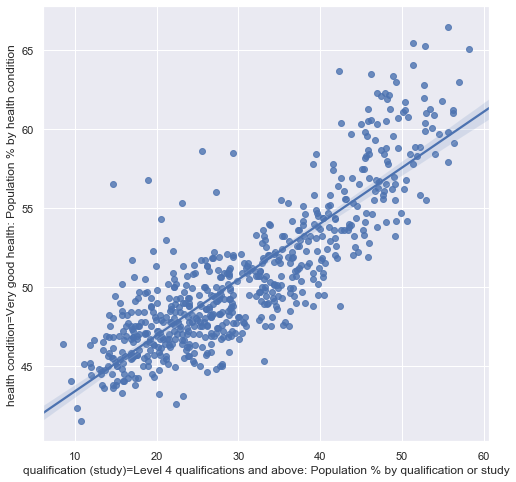

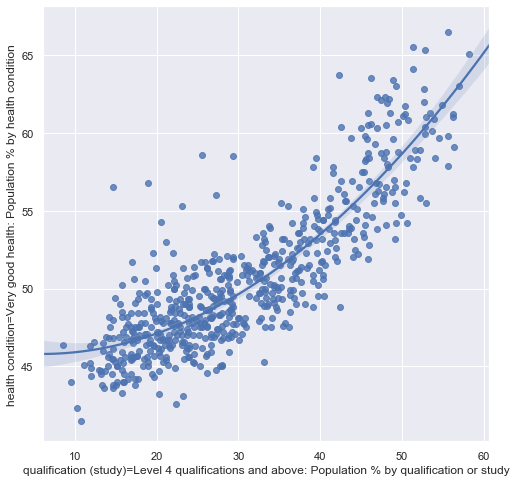

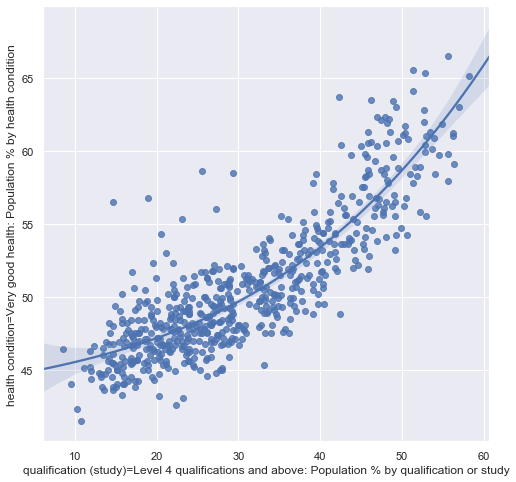

In [5]:
sns.set(color_codes=True)
plt.figure(figsize=(8,8))
sns.regplot(x=xattr, y=yattr, data=datann);
plt.show()
plt.figure(figsize=(8,8))
sns.regplot(x=xattr, y=yattr, data=datann, order=2);
plt.show()
plt.figure(figsize=(8,8))
sns.regplot(x=xattr, y=yattr, data=datann, order=3);
plt.show()

Same models, but more informative visualizations

<Figure size 720x720 with 0 Axes>

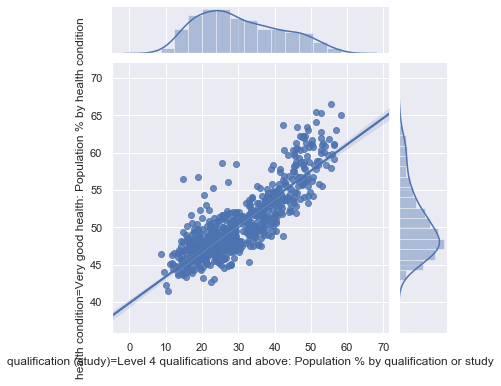

In [14]:
plt.figure(figsize=(10,10))
sns.jointplot(x=xattr, y=yattr, data=datann, kind="reg");
plt.show()
# plt.figure(figsize=(10,10))
# sns.jointplot(x=xattr, y=yattr, data=datann, kind="reg", order=2);
# plt.show()
# plt.figure(figsize=(10,10))
# sns.jointplot(x=xattr, y=yattr, data=datann, kind="reg", order=3);
# plt.show()
# sns.jointplot(x=xattr, y=yattr, data=datann, kind="reg", order=4);
# plt.show()

Looking at resuduals. Residual plots are not supposed to show any structure, otherwise you need to make better models.

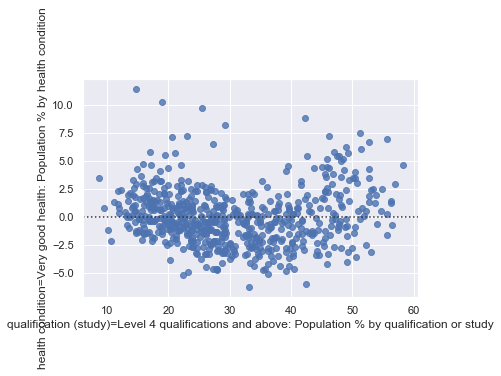

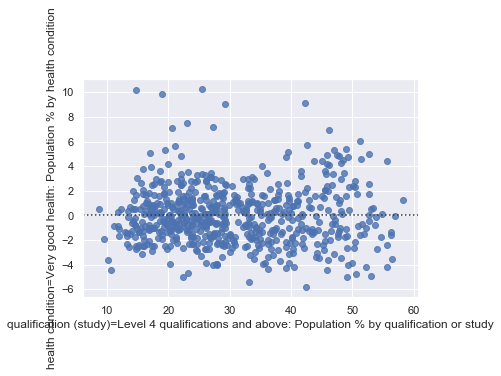

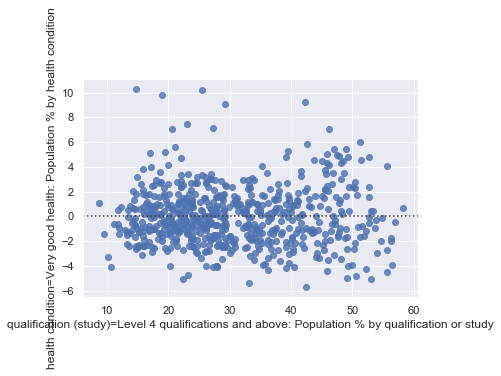

In [15]:
sns.residplot(x=xattr, y=yattr, data=datann);
plt.show()
sns.residplot(x=xattr, y=yattr, data=datann, order=2);
plt.show()
sns.residplot(x=xattr, y=yattr, data=datann, order=3);
plt.show()
#sns.residplot(x=xattr, y=yattr, data=datann, order=4);
#plt.show()

We shall check whether the interrelationship between the attributes varies over the geographic space. Tobler's law (https://en.wikipedia.org/wiki/Tobler%27s_first_law_of_geography) suggests that the geography and spatial proximity often makes influence on phenomena. We build separate models for the 32 boroughs of London and look for differences.

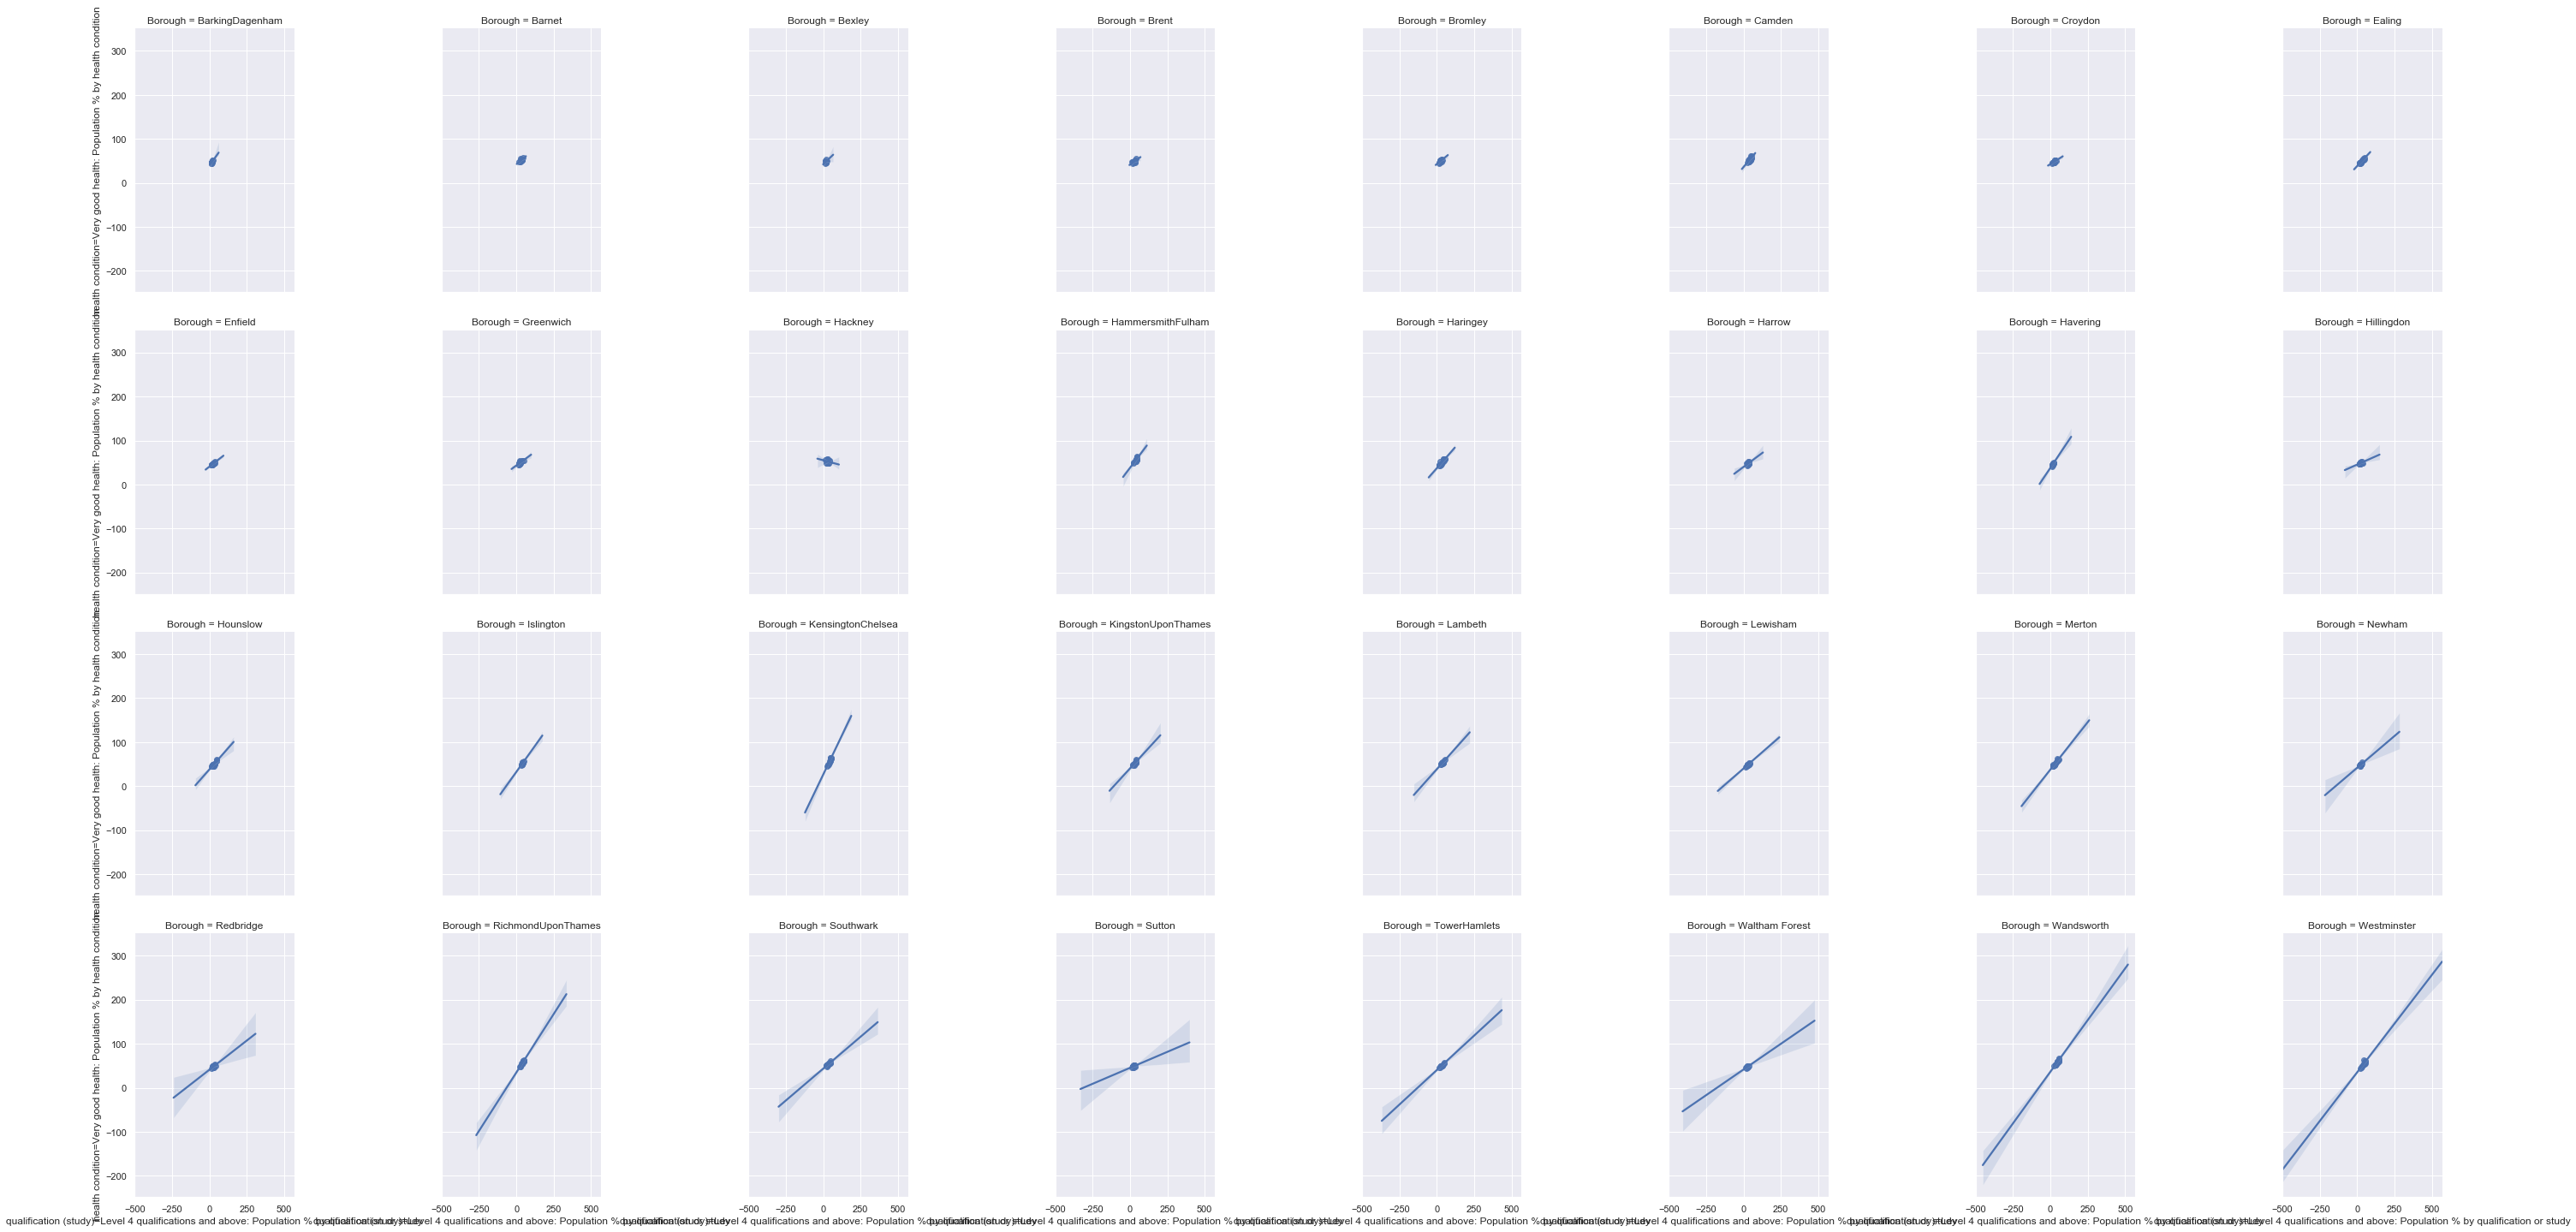

In [16]:
sns.lmplot(x=xattr, y=yattr, col="Borough", data=datann, order=1, col_wrap=8);
plt.show()

Although there are differences between the partial models, their number is too high and the amount of data used for generating some models is not sufficient. Hence, data partitioning based on the administrative division is not a good approach to refining the model.

It can be expected that the health condition may be related to the age structure of the population. We shall try to use the attribute 'Mean Age' as a conditional variable for dividing the data set into subsets.

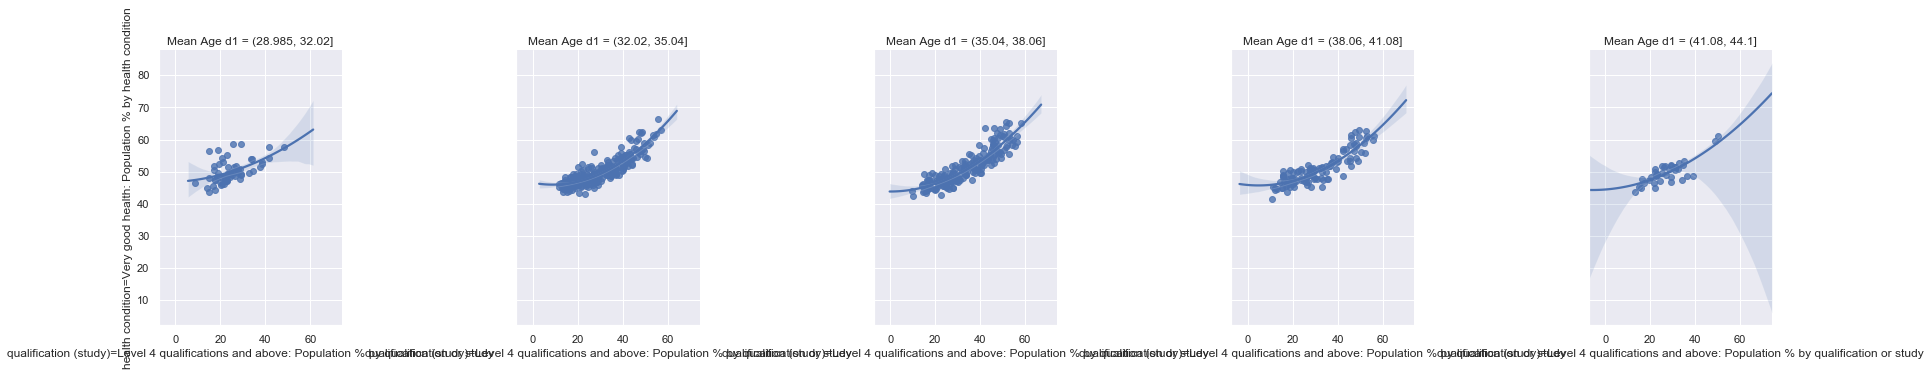

In [18]:
pd.options.mode.chained_assignment = None  # default='warn'
datann['Mean Age d1']=pd.cut(datann['Mean Age'], 5); # try different numbers of intervals, e.g., from 3 to 5
sns.lmplot(x=xattr, y=yattr, data=datann, order=2, col="Mean Age d1");
plt.show()

Although the results look interesting, we observe imbalance in counts of wards in the subsets. Therefore, instead of pd.cut() that divides attribute range into equal intervals, we'll use pd.qcut() that produces equal class sizes:

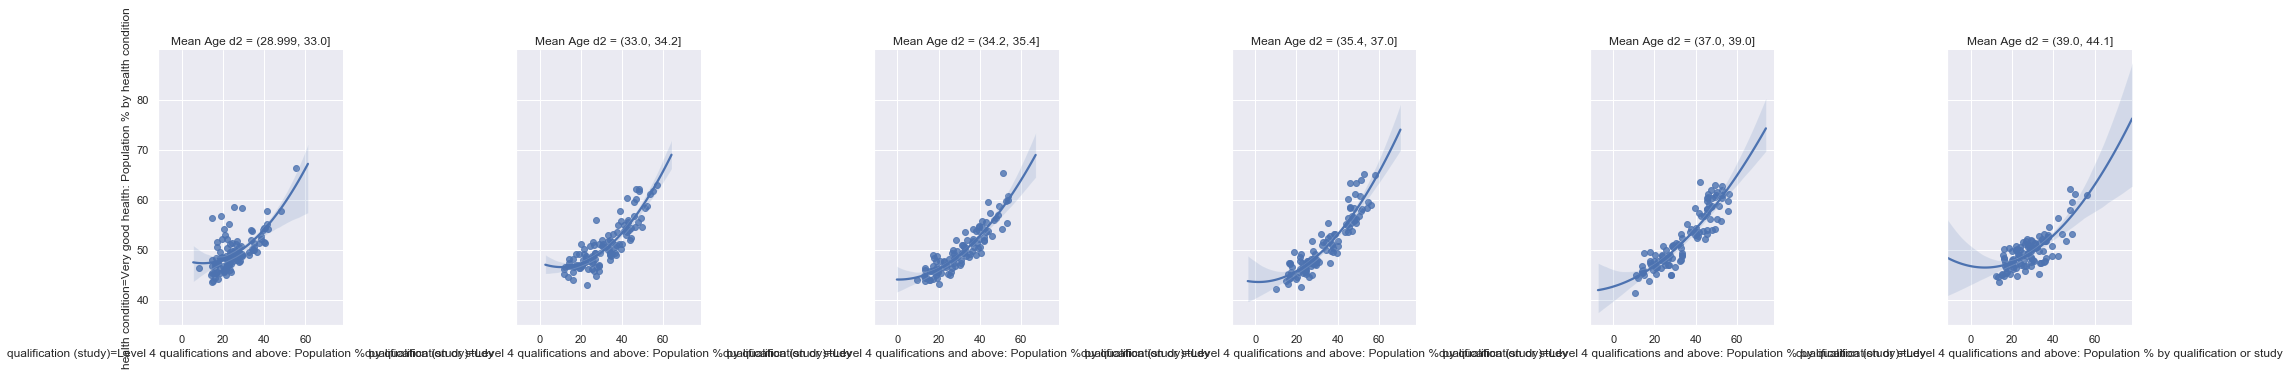

In [24]:
datann['Mean Age d2']=pd.qcut(datann['Mean Age'], 6);
sns.lmplot(x=xattr, y=yattr, data=datann, order=2, col="Mean Age d2");
plt.show()

In [25]:
display(datann)

,CODE,OLDCODE,NAME,ALTNAME,geometry,id,Name,Borough,N of all usual residents,Area Hectares,...,distance to work=5km to less than 10km: Population % by distance travelled to work,distance to work=10km to less than 20km: Population % by distance travelled to work,distance to work=20km to less than 30km: Population % by distance travelled to work,distance to work=30km to less than 40km: Population % by distance travelled to work,distance to work=40km to less than 60km: Population % by distance travelled to work,distance to work=60km and over: Population % by distance travelled to work,distance to work=Work mainly at or from home: Population % by distance travelled to work,distance to work=Other: Population % by distance travelled to work,Mean Age d1,Mean Age d2
25,E05000026,00ABFX,Abbey,None,"MULTIPOLYGON (((0.06913 51.53881, 0.06935 51.5...",E05000026,Abbey,BarkingDagenham,12786.0,125.24,...,7.5,13.2,2.0,0.5,0.4,0.8,2.7,6.7,"(28.985, 32.02]","(28.999, 33.0]"
26,E05000027,00ABFY,Alibon,None,"POLYGON ((0.15635 51.55102, 0.15642 51.54973, ...",E05000027,Alibon,BarkingDagenham,10385.0,136.06,...,5.5,9.5,3.5,0.7,0.4,0.6,2.2,5.7,"(32.02, 35.04]","(33.0, 34.2]"
27,E05000028,00ABFZ,Becontree,None,"POLYGON ((0.12713 51.55561, 0.12690 51.55526, ...",E05000028,Becontree,BarkingDagenham,11545.0,128.59,...,5.8,10.3,1.9,0.5,0.4,0.8,2.8,5.4,"(32.02, 35.04]","(33.0, 34.2]"
28,E05000029,00ABGA,Chadwell Heath,None,"POLYGON ((0.14818 51.59896, 0.14811 51.59868, ...",E05000029,Chadwell Heath,BarkingDagenham,10021.0,338.05,...,6.5,9.7,3.0,0.6,0.3,0.7,2.7,5.3,"(35.04, 38.06]","(35.4, 37.0]"
29,E05000030,00ABGB,Eastbrook,None,"POLYGON ((0.18512 51.56479, 0.18515 51.56475, ...",E05000030,Eastbrook,BarkingDagenham,10506.0,345.39,...,5.3,10.9,4.4,0.6,0.3,0.7,3.0,5.6,"(35.04, 38.06]","(37.0, 39.0]"
30,E05000031,00ABGC,Eastbury,None,"POLYGON ((0.12212 51.53851, 0.12214 51.53676, ...",E05000031,Eastbury,BarkingDagenham,11624.0,144.53,...,6.5,10.4,1.7,0.6,0.4,0.7,2.5,5.9,"(32.02, 35.04]","(28.999, 33.0]"
31,E05000032,00ABGD,Gascoigne,None,"MULTIPOLYGON (((0.07147 51.53665, 0.07169 51.5...",E05000032,Gascoigne,BarkingDagenham,12452.0,108.63,...,6.0,10.3,1.7,0.4,0.3,0.8,2.5,5.7,"(28.985, 32.02]","(28.999, 33.0]"
32,E05000033,00ABGE,Goresbrook,None,"POLYGON ((0.14778 51.53168, 0.14620 51.53150, ...",E05000033,Goresbrook,BarkingDagenham,11267.0,127.99,...,5.8,10.8,2.6,0.6,0.2,0.7,2.2,5.9,"(32.02, 35.04]","(33.0, 34.2]"
33,E05000034,00ABGF,Heath,None,"POLYGON ((0.16832 51.56353, 0.16838 51.56334, ...",E05000034,Heath,BarkingDagenham,10786.0,200.53,...,5.4,8.6,2.8,0.7,0.2,0.6,2.1,5.0,"(32.02, 35.04]","(34.2, 35.4]"
34,E05000035,00ABGG,Longbridge,None,"POLYGON ((0.10697 51.54952, 0.10700 51.54947, ...",E05000035,Longbridge,BarkingDagenham,11478.0,164.00,...,7.8,12.2,1.5,0.6,0.2,1.0,3.2,6.1,"(32.02, 35.04]","(34.2, 35.4]"


Now we'll try another conditioning attribute, 'Average distance to work (km)'. We shall discretize it into 3/5/7 equal size bins, and build 3/5/7 models accordingly.

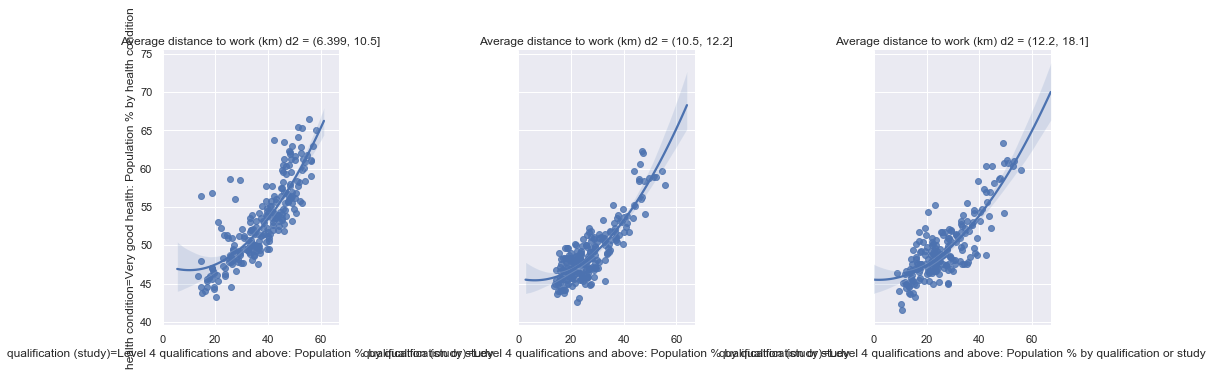

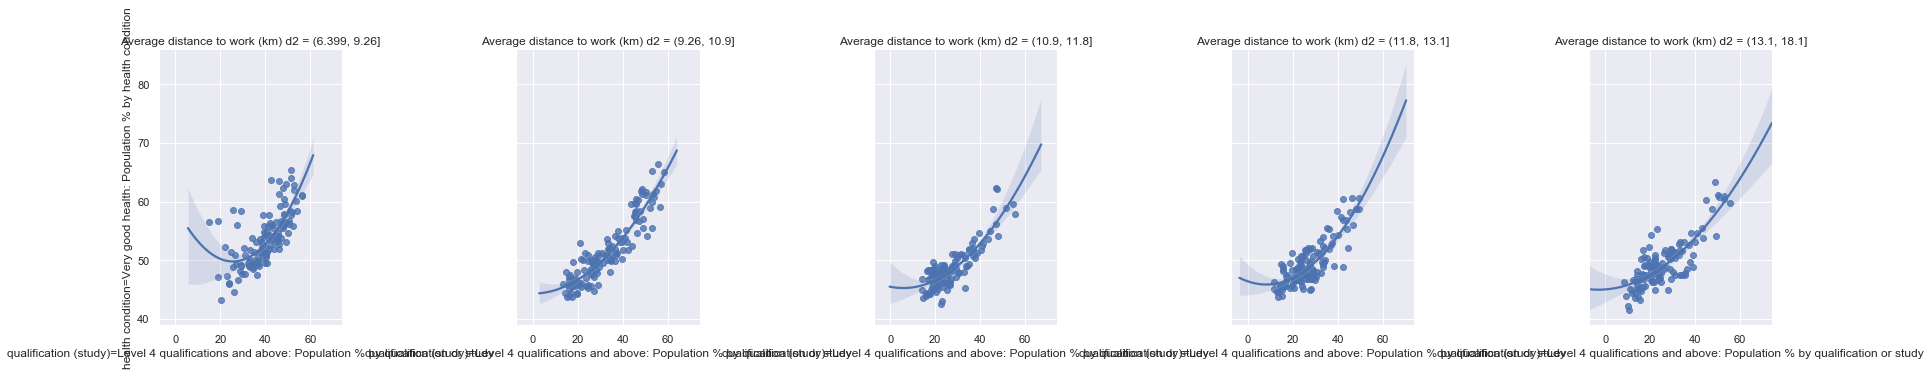

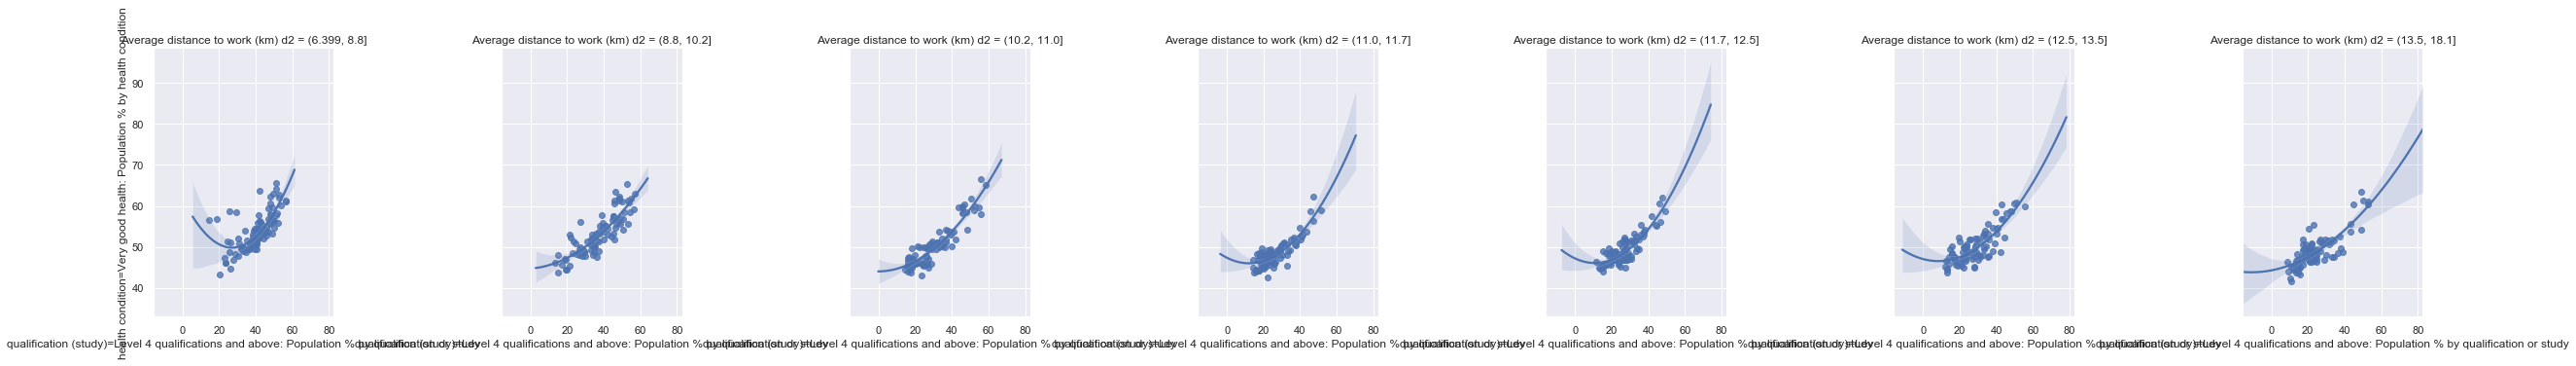

In [26]:
datann['Average distance to work (km) d2']=pd.qcut(datann['Average distance to work (km)'], 3);
sns.lmplot(x=xattr, y=yattr, data=datann, order=2, col="Average distance to work (km) d2");
plt.show()
datann['Average distance to work (km) d2']=pd.qcut(datann['Average distance to work (km)'], 5);
sns.lmplot(x=xattr, y=yattr, data=datann, order=2, col="Average distance to work (km) d2");
plt.show()
datann['Average distance to work (km) d2']=pd.qcut(datann['Average distance to work (km)'], 7);
sns.lmplot(x=xattr, y=yattr, data=datann, order=2, col="Average distance to work (km) d2");
plt.show()

Another approach for segmenting the data set is to use clustering. We shall build several clusters based on most relevant age group proportions, look at spatial distributions of the clusters, and then produce models for each cluster separately. Consider repeating the following steps with different attributes for clustering (e.g. population structure by gender, ethnic groups, other age groups, their combinations etc.) and different numbers of clusters.

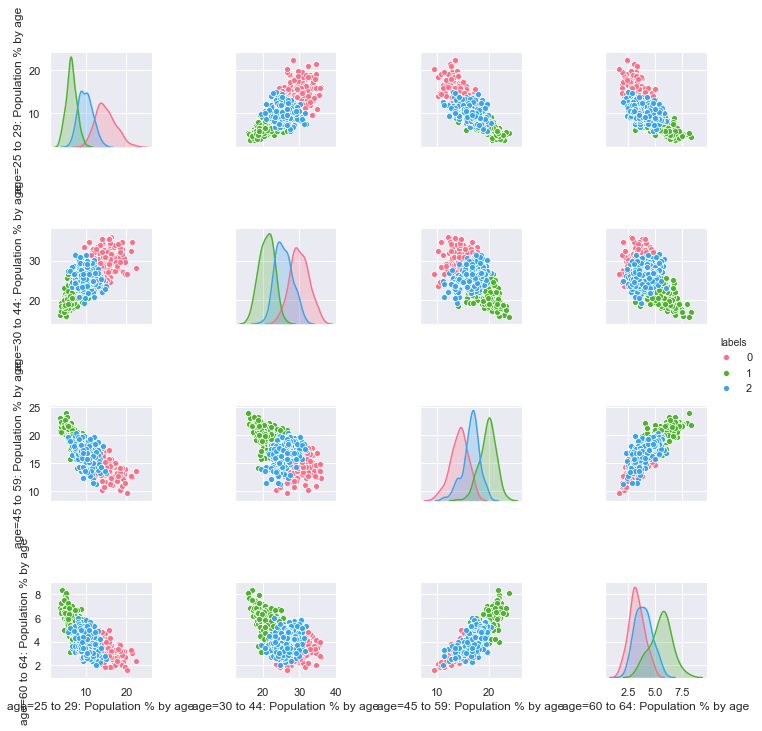

In [27]:
from sklearn.cluster import KMeans
attrlist=['age=25 to 29: Population % by age','age=30 to 44: Population % by age','age=45 to 59: Population % by age','age=60 to 64: Population % by age']
datann1=datann[attrlist]
# Number of clusters
kmeans = KMeans(n_clusters=3) # change parameters here for experimenting
# Fitting the input data
kmeans = kmeans.fit(datann1)
# Getting the cluster labels
datann1['labels'] = kmeans.predict(datann1)
sns.pairplot(data=datann1, hue='labels', palette="husl", diag_kind="kde", vars=attrlist);
plt.show()

Mapping spatial distribution of the clusters:

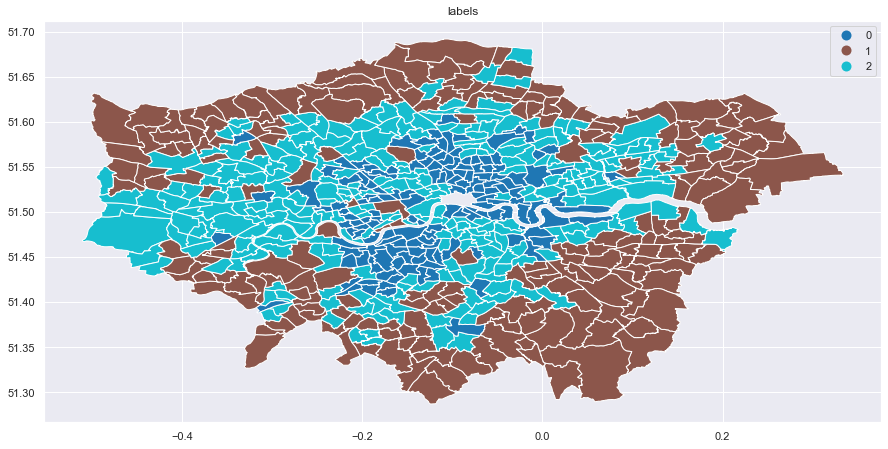

In [28]:
datann2=pd.concat([datann, datann1], axis=1)
datann2.crs = {'init' :'epsg:4326'}
#datann2 = datann2.to_crs(epsg=3395) # comment this line if you get "no file found" error in pyproj
attr="labels";
datann2[attr] = datann2.labels.astype(str)
ax=datann2.plot(column=attr, legend = True, figsize=(15,15)); #, cmap="Set1"
ax.set_title(attr);
plt.show()

Building separate models for the clusters:

In [ ]:
sns.lmplot(x=xattr, y=yattr, data=datann2, order=1, col="labels");
plt.show()